In [35]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [2]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1y", interval="1d")

[***                    6%%                      ]  3 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[******                12%%                      ]  6 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********             18%%                      ]  9 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[************          26%%                      ]  13 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*************         28%%                      ]  14 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[****************      34%%                      ]  17 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*****************     36%%                      ]  18 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[********************* 44%%                      ]  22 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**********************48%%                      ]  24 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************52%%                      ]  26 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************56%%*                     ]  28 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************60%%***                   ]  30 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************62%%****                  ]  31 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************68%%*******               ]  34 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************72%%*********             ]  36 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************76%%**********            ]  38 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************80%%************          ]  40 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************82%%*************         ]  41 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************88%%****************      ]  44 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************90%%*****************     ]  45 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************94%%*******************   ]  47 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************96%%********************  ]  48 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  50 of 50 completed


/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
data.head()

Adj Close                                                  \
                  AAPL        ABBV         ACN        ADBE         AMD   
Date                                                                     
2024-02-05  186.765015  165.240677  365.811768  630.500000  174.229996   
2024-02-06  188.377136  167.199326  360.240753  607.140015  167.880005   
2024-02-07  188.486588  168.858871  362.166901  615.849976  170.940002   
2024-02-08  187.401932  168.646591  363.974518  615.859985  169.350006   
2024-02-09  188.169144  167.961563  367.125488  627.210022  172.479996   

                                                                        ...  \
                  AMZN        AVGO         AXP         BLK       BRK-B  ...   
Date                                                                    ...   
2024-02-05  170.309998  122.657883  203.681839  764.904602  390.760010  ...   
2024-02-06  169.149994  120.640076  203.395035  769.602356  393.739990  ...   
2024-02-07  170.529999  124.035324  206.787430  776.165649  397.660004  ...   
2024-02-08  169.839996  125.781815  208.894058  774.700684  397.489990  ...   
2024-02-09  174.449997  126.638275  210.140244  778.617126  398.359985  ...   

              Volume                                                          \
                 PFE       PG       PM      TMO       TSLA      TXN      UNH   
Date                                                                           
2024-02-05  42633400  6931900  4672000  1473700  134294400  4190100  3646300   
2024-02-06  56958700  6185400  5160100  1328100  122676000  4139800  2745400   
2024-02-07  36843000  7209300  4694300  1451400  111535200  4627900  4109100   
2024-02-08  29048400  6121600  9260300  1549300   83034000  3487700  3343000   
2024-02-09  29062700  5978000  4966300  1280800   84476300  3919500  2715400   

                                        
                UNP        V       XOM  
Date                                    
2024-02-05  2701300  4899100  17190900  
2024-02-06  2357300  4400000  13347900  
2024-02-07  2337200  4785900  13826800  
2024-02-08  1871500  5833400  19636900  
2024-02-09  2012500  4618300  20410500  

[5 rows x 300 columns]

In [4]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   211.014838  174.918952  338.339593  509.648605  154.149203  191.271793   
std     26.034496   12.231854   27.783937   46.748146   20.559348   18.819300   
min    164.405121  150.744324  279.392487  405.920013  114.169998  161.020004   
25%    186.159470  165.357147  314.192596  477.580002  139.415001  178.419998   
50%    221.446365  172.863022  343.899994  507.230011  155.770004  185.949997   
75%    228.894142  186.859550  361.059998  546.904999  166.555000  199.314995   
max    259.019989  201.965424  391.619995  630.500000  211.380005  242.059998   

                                                        ...        Volume  \
             AVGO         AXP          BLK       BRK-B  ...           PFE   
count  251.000000  251.000000   251.000000  251.000000  ...  2.510000e+02   
mean   161.774261  253.795653   878.304461  434.901116  ...  3.798589e+07   
std     32.580080   32.302265   106.624301   26.036374  ...  1.578160e+07   
min    119.376144  203.395035   734.400391  390.760010  ...  1.518010e+07   
25%    133.390366  228.663986   782.497131  409.125000  ...  2.854580e+07   
50%    160.103027  244.206207   845.613708  437.660004  ...  3.503000e+07   
75%    173.960732  276.400162   986.723816  458.570007  ...  4.384765e+07   
max    249.331955  325.869995  1075.500000  483.079987  ...  1.310744e+08   

                                                                             \
                 PG            PM           TMO          TSLA           TXN   
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02   
mean   6.578005e+06  5.326448e+06  1.543089e+06  9.168298e+07  5.542506e+06   
std    2.754774e+06  2.186426e+06  6.694181e+05  3.312472e+07  2.340603e+06   
min    2.460800e+06  1.647800e+06  4.887000e+05  3.716760e+07  1.950900e+06   
25%    5.091450e+06  3.954900e+06  1.119400e+06  6.822425e+07  4.133600e+06   
50%    6.046800e+06  4.860500e+06  1.397600e+06  8.384670e+07  5.035200e+06   
75%    7.199800e+06  5.933650e+06  1.789550e+06  1.068110e+08  6.213250e+06   
max    2.864750e+07  1.837440e+07  6.150900e+06  2.438697e+08  1.907880e+07   

                                                               
                UNH           UNP             V           XOM  
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  
mean   4.096017e+06  2.390060e+06  6.937821e+06  1.590067e+07  
std    2.478928e+06  8.346384e+05  3.698323e+06  5.390189e+06  
min    1.581900e+06  6.690000e+05  2.684100e+06  7.732900e+06  
25%    2.676200e+06  1.822100e+06  4.836800e+06  1.259525e+07  
50%    3.332800e+06  2.252300e+06  5.969900e+06  1.486350e+07  
75%    4.527700e+06  2.792050e+06  7.985500e+06  1.765065e+07  
max    2.273420e+07  6.802600e+06  2.781090e+07  5.222060e+07  

[8 rows x 300 columns]

In [ ]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [ ]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-05       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-06  0.863182  1.185331 -1.522918 -3.704994 -3.644603 -0.681113   
2024-02-07  0.058102  0.992555  0.534683  1.434589  1.822729  0.815847   
2024-02-08 -0.575455 -0.125715  0.499112  0.001625 -0.930149 -0.404622   
2024-02-09  0.409394 -0.406191  0.865712  1.842957  1.848237  2.714320   
...              ...       ...       ...       ...       ...       ...   
2025-01-29  0.461683  0.257421 -1.049182 -0.261946  2.785320 -0.453490   
2025-01-30 -0.739474  0.222526  1.690611  0.978085  1.286751 -1.025017   
2025-01-31 -0.669219  4.696840  1.103089 -1.917038 -2.448262  1.295599   
2025-02-03 -3.385596  3.393152  0.067536  0.262886 -1.448901 -0.109388   
2025-02-04  2.100789 -0.099928  1.664028  0.371638  4.576882  1.954342   

                AVGO       AXP       

In [37]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-05       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-06  0.008595  0.011784 -0.015346 -0.037754 -0.037127 -0.006834   
2024-02-07  0.000581  0.009877  0.005333  0.014244  0.018063  0.008125   
2024-02-08 -0.005771 -0.001258  0.004979  0.000016 -0.009345 -0.004054   
2024-02-09  0.004086 -0.004070  0.008620  0.018262  0.018314  0.026781   
...              ...       ...       ...       ...       ...       ...   
2025-01-29  0.004606  0.002571 -0.010547 -0.002623  0.027472 -0.004545   
2025-01-30 -0.007422  0.002223  0.016765  0.009733  0.012785 -0.010303   
2025-01-31 -0.006715  0.045899  0.010970 -0.019357 -0.024787  0.012873   
2025-02-03 -0.034442  0.033369  0.000675  0.002625 -0.014595 -0.001094   
2025-02-04  0.020790 -0.001000  0.016503  0.003709  0.044752  0.019355   

                AVGO       AXP       

In [6]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

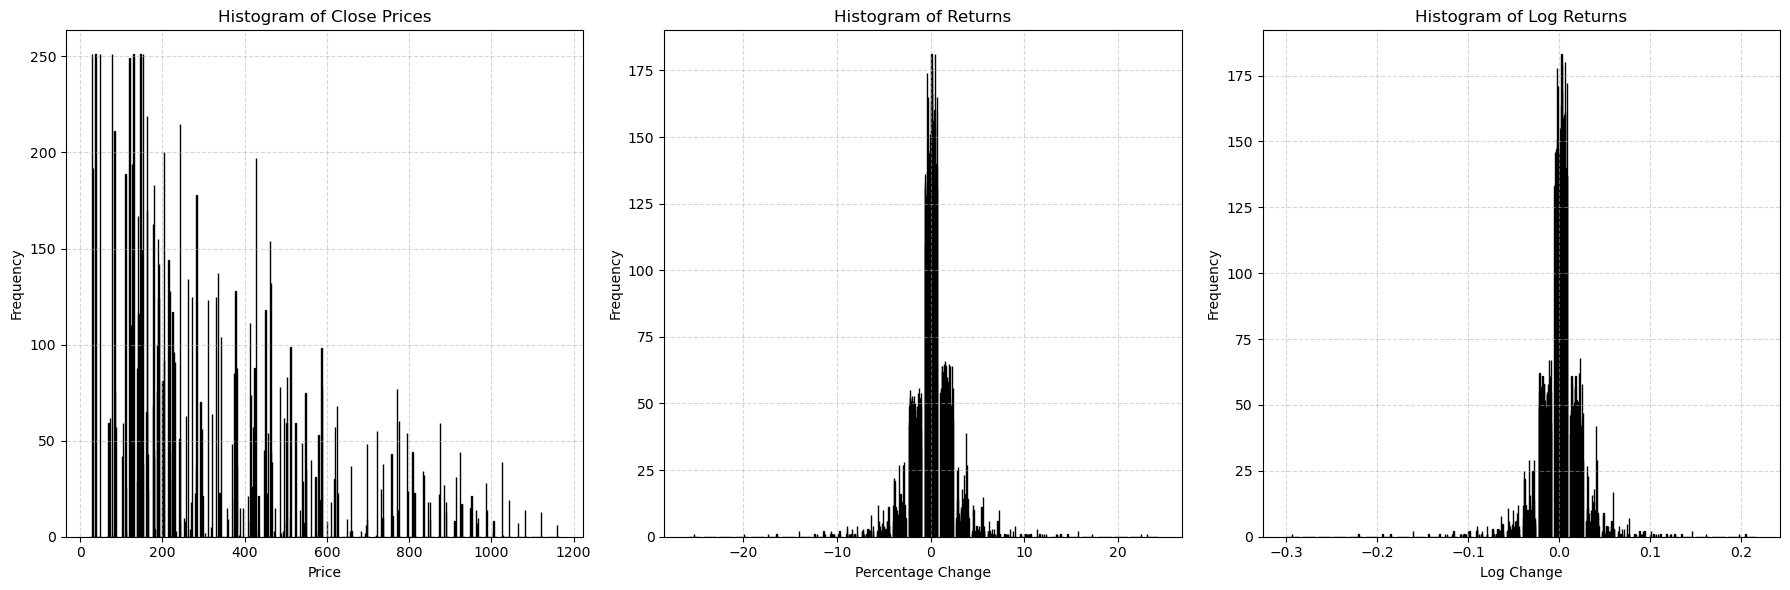

In [38]:
# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot (left side)
axes[0].hist(close_prices, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Close Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[1].hist(returns, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Returns')
axes[1].set_xlabel('Percentage Change')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[2].hist(log_returns, bins=30, edgecolor='black')
axes[2].set_title('Histogram of Log Returns')
axes[2].set_xlabel('Log Change')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.